In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('traincp.csv')
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [3]:
df_copy = df.copy()
df_copy.shape

(36992, 25)

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [5]:
df_copy.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


# Handling missing data

In [6]:
df_copy.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [7]:
df_copy['region_category'] = df_copy['region_category'].fillna(df_copy['region_category'].mode()[0])
df_copy['preferred_offer_types'] = df_copy['preferred_offer_types'].fillna(df_copy['preferred_offer_types'].mode()[0])
df_copy['points_in_wallet']= df_copy['points_in_wallet'].fillna(df_copy['points_in_wallet'].mean())

In [8]:
df_copy.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

# EDA

In [10]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df_copy)
#profile.to_file(output_file="churn.html")

C:\Users\baiba\AppData\Local\Temp\ipykernel_15612\4154220253.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df1 = df[['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']]
df1.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,18,17,300.63,53005.25,781.75,2
1,32,16,306.34,12838.38,NaN,1
2,44,14,516.16,21027.00,500.69,5
3,37,11,53.27,25239.56,567.66,5
4,31,20,113.13,24483.66,663.06,5


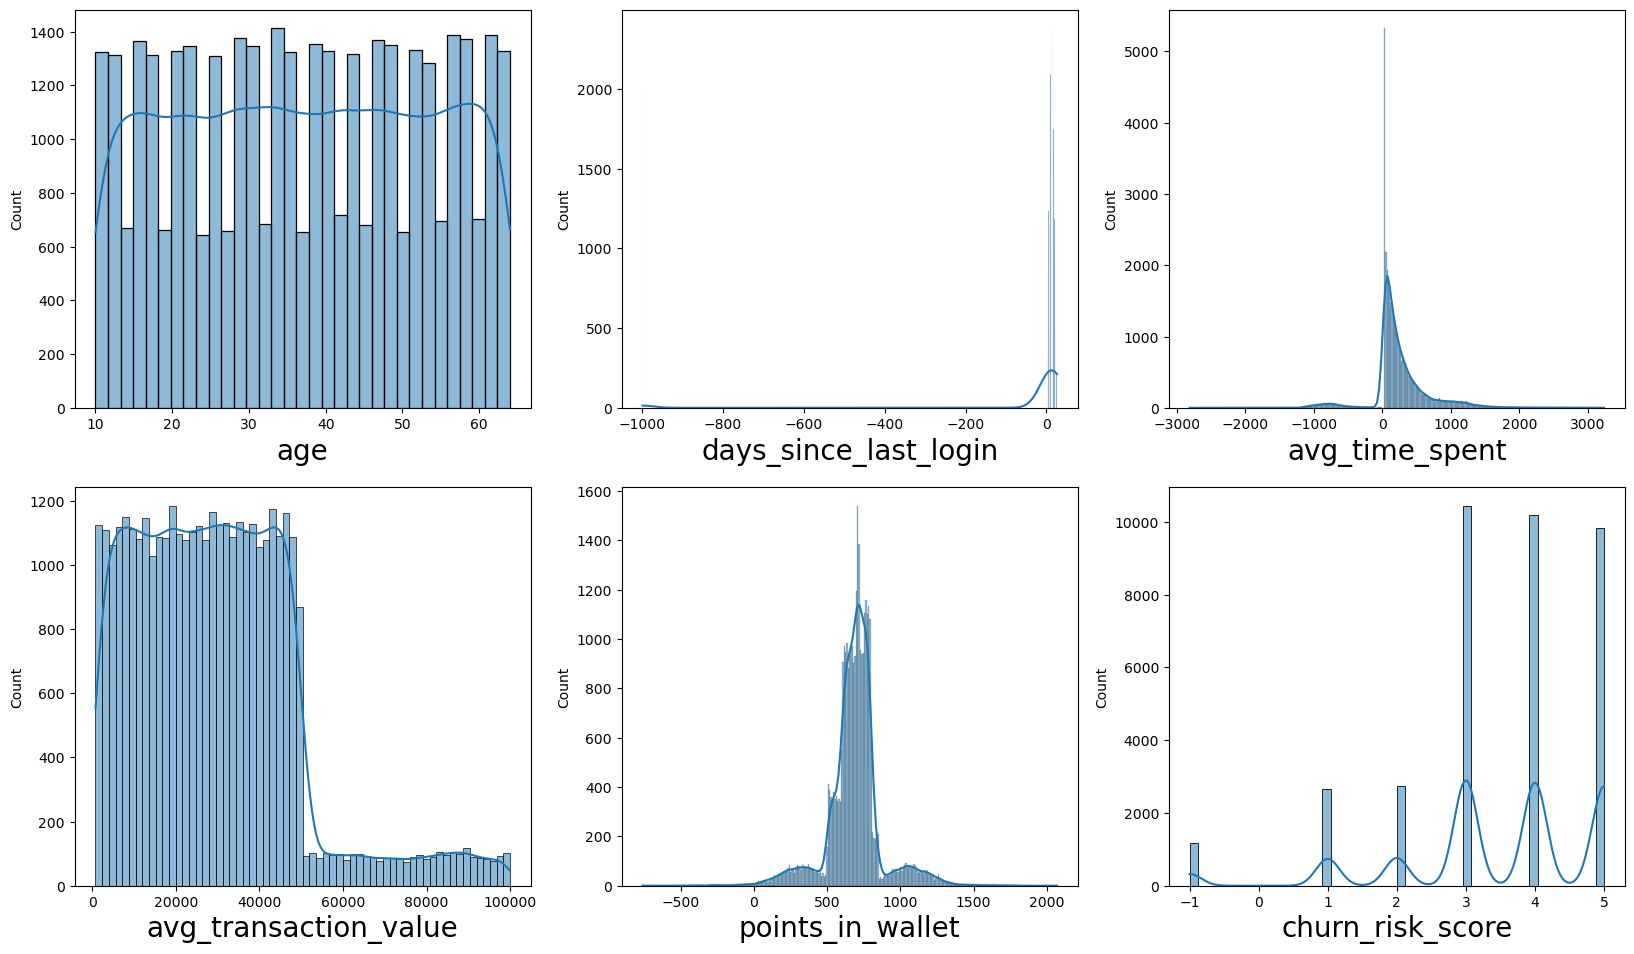

In [10]:
# lets see how data is distributed for every column
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in df1:
    if plotnumber<=6:
        ax = plt.subplot(5,3,plotnumber)
        sns.histplot(df1[column], kde = True)
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

In [11]:
df_copy[['joining_date']].head()

,joining_date
0,2017-08-17
1,2017-08-28
2,2016-11-11
3,2016-10-29
4,2017-09-12


In [12]:
df_copy['joining_day'] = pd.to_datetime(df_copy.joining_date, format="%Y/%m/%d").dt.day
df_copy['joining_month'] = pd.to_datetime(df_copy.joining_date, format="%Y/%m/%d").dt.month
df_copy['joining_year'] = pd.to_datetime(df_copy.joining_date, format="%Y/%m/%d").dt.year
df_copy.drop(["joining_date"], axis=1, inplace=True)
df_copy.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_day,joining_month,joining_year
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2,17,8,2017
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,686.882199,Yes,No,Yes,Solved,Quality Customer Care,1,28,8,2017
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5,11,11,2016
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,567.660000,No,Yes,Yes,Unsolved,Poor Website,5,29,10,2016
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,663.060000,No,Yes,Yes,Solved,Poor Website,5,12,9,2017


In [13]:
# extract hour, minutes and seconds
df_copy[['last_visit_time_hour','last_visit_time_minutes','last_visit_time_seconds']] = df_copy['last_visit_time'].astype(str).str.split(':', expand=True).astype(int)
# drop column
df_copy.drop(['last_visit_time'], axis=1, inplace=True)

In [14]:
df_copy.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,past_complaint,complaint_status,feedback,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,last_visit_time_seconds
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,No,Not Applicable,Products always in Stock,2,17,8,2017,16,8,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,Yes,Solved,Quality Customer Care,1,28,8,2017,12,38,13
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,Yes,Solved in Follow-up,Poor Website,5,11,11,2016,22,53,21
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,Yes,Unsolved,Poor Website,5,29,10,2016,15,57,50
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,Yes,Solved,Poor Website,5,12,9,2017,15,46,44


# Handling categorical columns

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36992 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [16]:
df_copy['gender'].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

In [17]:
df_copy['region_category'].value_counts()

Town       19556
City       12737
Village     4699
Name: region_category, dtype: int64

In [18]:
df_copy['membership_category'].value_counts()

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64

In [19]:
df_copy['joined_through_referral'].value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [20]:
df_copy['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

In [21]:
df_copy['medium_of_operation'].value_counts()

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

In [22]:
df_copy['internet_option'].value_counts()

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

In [23]:
df_copy['used_special_discount'].value_counts()

Yes    20342
No     16650
Name: used_special_discount, dtype: int64

In [24]:
df_copy['offer_application_preference'].value_counts()

Yes    20440
No     16552
Name: offer_application_preference, dtype: int64

In [25]:
df_copy['past_complaint'].value_counts()

No     18602
Yes    18390
Name: past_complaint, dtype: int64

In [26]:
df_copy['complaint_status'].value_counts()

Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: complaint_status, dtype: int64

In [27]:
df_copy['feedback'].value_counts()

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64

In [28]:
df_copy = pd.get_dummies(df_copy,columns=['gender','region_category','membership_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option','used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback'],drop_first=True)

In [29]:
df_copy.head()

,customer_id,Name,age,security_no,referral_id,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,...,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe4300490044003600300030003800,Pattie Morrisey,18,XW0DQ7H,xxxxxxxx,17,300.63,53005.25,17.0,781.750000,...,0,0,0,0,0,1,0,0,0,0
1,fffe43004900440032003100300035003700,Traci Peery,32,5K0N3X1,CID21329,16,306.34,12838.38,10.0,686.882199,...,0,0,0,0,0,0,1,0,0,0
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,1F2TCL3,CID12313,14,516.16,21027.00,22.0,500.690000,...,1,0,0,0,1,0,0,0,0,0
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,VJGJ33N,CID3793,11,53.27,25239.56,6.0,567.660000,...,0,1,0,0,1,0,0,0,0,0
4,fffe43004900440031003900350030003600,Meghan Kosak,31,SVZXCWB,xxxxxxxx,20,113.13,24483.66,16.0,663.060000,...,0,0,0,0,1,0,0,0,0,0


In [30]:
df_copy.columns

Index(['customer_id', 'Name', 'age', 'security_no', 'referral_id',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_o

In [31]:
df_copy.drop(['customer_id','Name','security_no','referral_id','avg_frequency_login_days'], axis=1, inplace=True)

In [32]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          36992 non-null  int64  
 1   days_since_last_login                        36992 non-null  int64  
 2   avg_time_spent                               36992 non-null  float64
 3   avg_transaction_value                        36992 non-null  float64
 4   points_in_wallet                             36992 non-null  float64
 5   churn_risk_score                             36992 non-null  int64  
 6   joining_day                                  36992 non-null  int64  
 7   joining_month                                36992 non-null  int64  
 8   joining_year                                 36992 non-null  int64  
 9   last_visit_time_hour                         36992 non-null  int32  
 10

In [33]:
df_copy['churn_risk_score'].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

In [34]:
df_copy.loc[df_copy['churn_risk_score'] == -1, 'churn_risk_score'] = 0

In [35]:
df_copy['churn_risk_score'].value_counts()

3    10424
4    10185
5     9827
2     2741
1     2652
0     1163
Name: churn_risk_score, dtype: int64

In [36]:
fem = df_copy[(df_copy['gender_M']==0) & (df_copy['gender_Unknown']==0)]
male = df_copy[df_copy['gender_M']==1]

fem_counts = fem['churn_risk_score'].value_counts().sort_index()
male_counts = male['churn_risk_score'].value_counts().sort_index()

fem_percentages = (fem_counts / len(fem)) * 100
male_percentages = (male_counts / len(male)) * 100

fem_counts_df = pd.DataFrame({
    'Counts': fem_counts,
    'Percentage': fem_percentages
})

male_counts_df = pd.DataFrame({
    'Counts': male_counts,
    'Percentage': male_percentages
})

fem_counts_df

,Counts,Percentage
0,598,3.234181
1,1333,7.209302
2,1351,7.306652
3,5159,27.901568
4,5123,27.706869
5,4926,26.641428


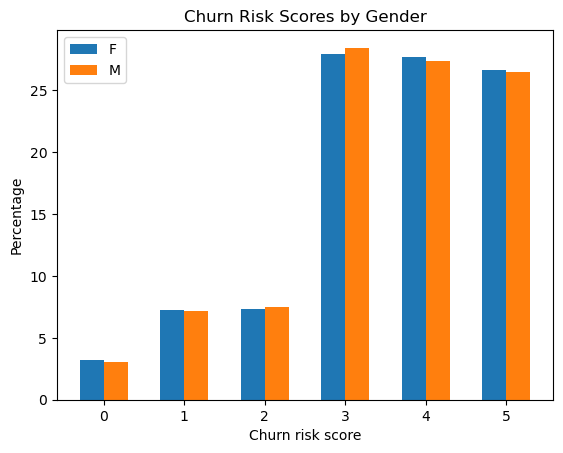

In [37]:
X_axis = np.arange(6)

plt.bar(X_axis - 0.15, fem_counts_df['Percentage'], 0.3, label = 'F')
plt.bar(X_axis + 0.15, male_counts_df['Percentage'], 0.3, label = 'M')

plt.xlabel('Churn risk score')
plt.ylabel('Percentage')
plt.title('Churn Risk Scores by Gender')
plt.legend()
plt.show()

In [38]:
df_copy.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,...,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.00000,36992.000000,36992.000000,...,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.494837,15.687122,6.53344,2016.006569,11.537711,...,0.123729,0.125541,0.169010,0.171659,0.169523,0.037359,0.036765,0.038306,0.169739,0.037603
std,15.867412,228.819900,398.289149,19444.806226,184.811682,1.317929,8.797726,3.45013,0.819384,6.921573,...,0.329277,0.331335,0.374765,0.377089,0.375218,0.189644,0.188186,0.191936,0.375409,0.190236
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,0.000000,1.000000,1.00000,2015.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,624.350000,3.000000,8.000000,4.00000,2015.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,686.882199,4.000000,16.000000,7.00000,2016.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,16.000000,356.515000,40855.110000,757.002500,5.000000,23.000000,10.00000,2017.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000,31.000000,12.00000,2017.000000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


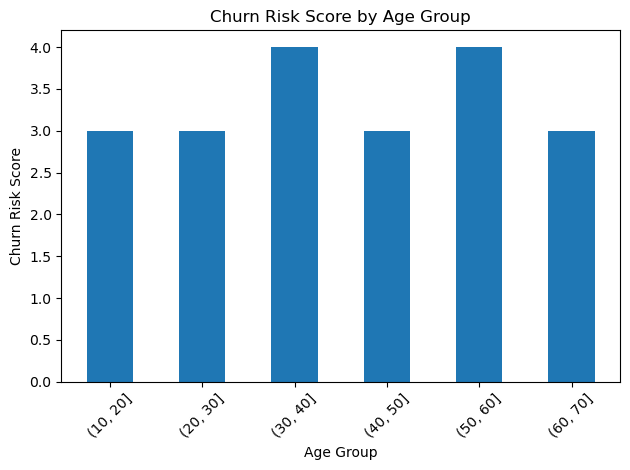

In [39]:
bins = range(10, 80, 10)

df_copy['age_group'] = pd.cut(df_copy['age'], bins)
mean_churn_by_age = df_copy.groupby('age_group')['churn_risk_score'].apply(lambda x: x.mode().iloc[0])
mean_churn_by_age.index = mean_churn_by_age.index.astype(str)

# Create a bar plot
plt.bar(mean_churn_by_age.index, mean_churn_by_age.values,0.5)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Churn Risk Score')
plt.title('Churn Risk Score by Age Group')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Preprocessing of test dataset

In [40]:
test = pd.read_csv("testcp.csv")
test.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [41]:
tf = test.copy()

In [42]:
tf['region_category'] = tf['region_category'].fillna(tf['region_category'].mode()[0])
tf['preferred_offer_types'] = tf['preferred_offer_types'].fillna(tf['preferred_offer_types'].mode()[0])
tf['points_in_wallet']= tf['points_in_wallet'].fillna(tf['points_in_wallet'].mean())

tf['joining_day'] = pd.to_datetime(tf.joining_date, format="%Y/%m/%d").dt.day
tf['joining_month'] = pd.to_datetime(tf.joining_date, format="%Y/%m/%d").dt.month
tf['joining_year'] = pd.to_datetime(tf.joining_date, format="%Y/%m/%d").dt.year
tf.drop(["joining_date"], axis=1, inplace=True)

# extract hour, minutes and seconds
tf[['last_visit_time_hour','last_visit_time_minutes','last_visit_time_seconds']] = tf['last_visit_time'].astype(str).str.split(':', expand=True).astype(int)
# drop column
tf.drop(['last_visit_time'], axis=1, inplace=True)

tf = pd.get_dummies(tf,columns=['gender','region_category','membership_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option','used_special_discount','offer_application_preference','past_complaint','complaint_status','feedback'],drop_first=True)

tf.drop(['customer_id','Name','security_no','referral_id','avg_frequency_login_days'], axis=1, inplace=True)


tf.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,...,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,50,12,386.26,40721.44,733.830000,2,11,2015,7,19,...,0,0,0,1,0,0,0,0,0,0
1,41,11,37.80,9644.40,726.000000,1,3,2016,22,21,...,0,0,0,0,1,0,0,0,0,0
2,31,18,215.36,3693.25,713.780000,3,3,2017,16,40,...,1,0,0,0,0,0,0,0,0,0
3,64,-999,44.57,36809.56,744.970000,18,8,2017,14,56,...,0,0,0,0,0,0,0,0,1,0
4,16,6,349.88,40675.86,299.048351,5,5,2015,2,57,...,1,0,0,0,1,0,0,0,0,0


# Feature selection

In [43]:
x = df_copy.drop(columns=['churn_risk_score','age_group'])
y = df_copy['churn_risk_score'].values

In [44]:
x.shape

(36992, 44)

In [45]:
x.dtypes

age                                              int64
days_since_last_login                            int64
avg_time_spent                                 float64
avg_transaction_value                          float64
points_in_wallet                               float64
joining_day                                      int64
joining_month                                    int64
joining_year                                     int64
last_visit_time_hour                             int32
last_visit_time_minutes                          int32
last_visit_time_seconds                          int32
gender_M                                         uint8
gender_Unknown                                   uint8
region_category_Town                             uint8
region_category_Village                          uint8
membership_category_Gold Membership              uint8
membership_category_No Membership                uint8
membership_category_Platinum Membership          uint8
membership

In [46]:
# important features using extratreeregressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [47]:
print(selection.feature_importances_)

[0.01790592 0.01548284 0.01885703 0.08695478 0.06721912 0.01740487
 0.01697735 0.01089801 0.01751053 0.01783034 0.01850354 0.007551
 0.00025726 0.00853247 0.00575893 0.03480595 0.15266334 0.04349821
 0.03582119 0.06320689 0.00654009 0.00698289 0.00793144 0.00758982
 0.00528829 0.00656182 0.00653085 0.00688859 0.00758587 0.00642231
 0.00572317 0.00425246 0.00425492 0.00525942 0.00543809 0.00529328
 0.00645065 0.0061342  0.00513566 0.05239116 0.05876884 0.05321586
 0.00592626 0.05579448]


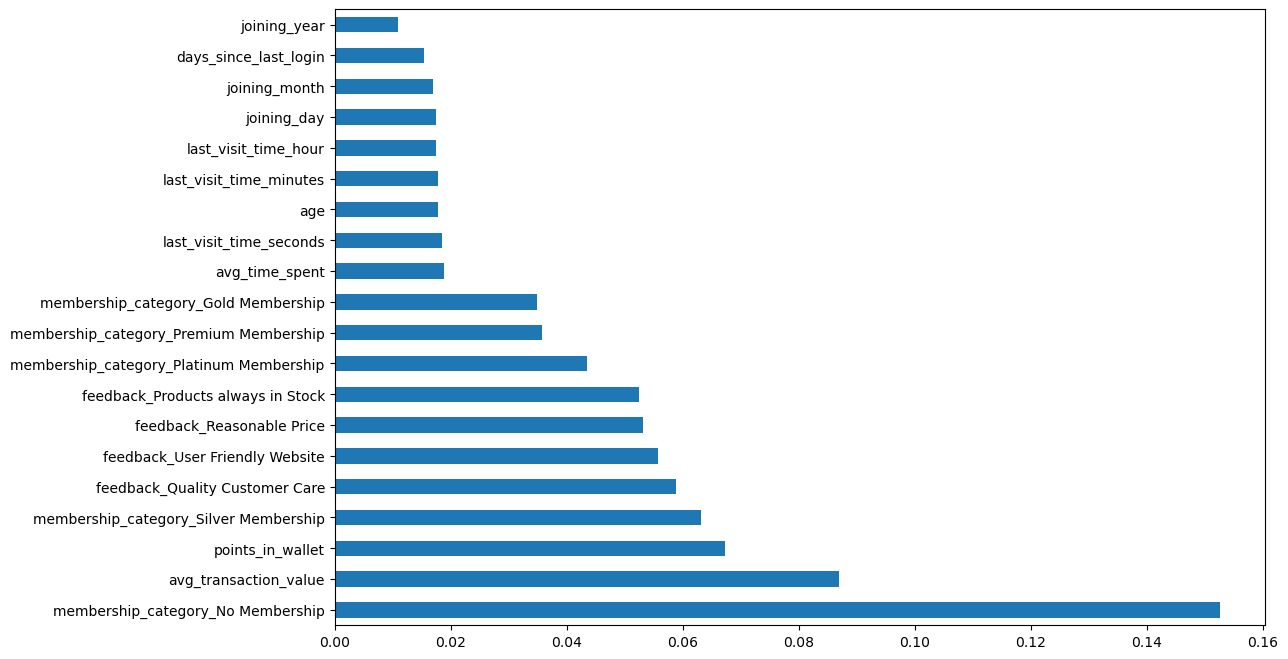

In [48]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

# Baseline Model

In [50]:
from sklearn import linear_model

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score

# Create and train the logistic regression model
lr_model = LogisticRegression(multi_class='ovr', solver='liblinear')
lr_model.fit(x_train, y_train)

# Predict probabilities for each class using predict_proba
y_proba = lr_model.predict_proba(x_test)

# Calculate ROC AUC for each class
roc_auc_scores = []
for i in range(len(lr_model.classes_)):
    roc_auc = roc_auc_score((y_test == lr_model.classes_[i]).astype(int), y_proba[:, i])
    roc_auc_scores.append(roc_auc)

# Print ROC AUC scores for each class
for i, class_label in enumerate(lr_model.classes_):
    print(f"Class {class_label}: ROC AUC = {roc_auc_scores[i]:.4f}")

# Calculate and print the mean ROC AUC score across all classes
mean_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f"Mean ROC AUC = {mean_roc_auc:.4f}")



Class 0: ROC AUC = 0.5080
Class 1: ROC AUC = 0.7815
Class 2: ROC AUC = 0.7373
Class 3: ROC AUC = 0.7465
Class 4: ROC AUC = 0.5845
Class 5: ROC AUC = 0.7756
Mean ROC AUC = 0.6889


Accuracy = 0.5343
Precision = 0.5297
Recall = 0.5343
F1 Score = 0.5070
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       236
           1       0.62      0.25      0.35       506
           2       0.67      0.26      0.37       548
           3       0.51      0.83      0.63      2087
           4       0.51      0.40      0.44      2020
           5       0.58      0.58      0.58      2002

    accuracy                           0.53      7399
   macro avg       0.48      0.38      0.40      7399
weighted avg       0.53      0.53      0.51      7399



C:\Users\baiba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\baiba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\baiba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\baiba\anaconda3\lib\site-packages\sklearn\metrics\_classifi

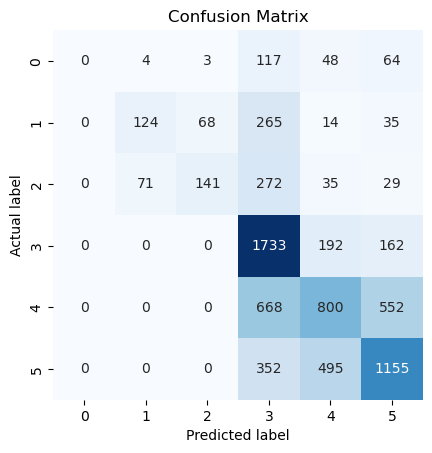

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict classes
y_pred = lr_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {accuracy:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title("Confusion Matrix")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision = {precision:.4f}")
print(f"Recall = {recall:.4f}")
print(f"F1 Score = {f1:.4f}")

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


# Model training

In [98]:
# XGBoost clasifier
from xgboost import XGBClassifier
xg = XGBClassifier(objective='binary:logistic')
xg.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [99]:
# checking accuracy of test dataset
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

testing accuracy is :  75.68590350047305


# Hyperparameter tuning

In [100]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier=xgboost.XGBClassifier()

In [101]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [110]:
rs_model =RandomizedSearchCV(classifier,param_distributions=params,n_iter=10,scoring='roc_auc', n_jobs=-1, cv = 5, verbose=3)
    

In [111]:
rs_model.fit(x,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\baiba\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.5,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0.3, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob',
                                           predictor=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [112]:
rs_model.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [113]:
rs_model.best_params_

{'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.3,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [130]:
#classifier=xgboost.XGBClassifier(min_child_weight = 5, n_estimators=100, max_depth = 5, learning_rate = 0.15, gamma = 0.4, colsample_bytree = 0.7,objective='multi:softprob')
#classifier=xgboost.XGBClassifier(min_child_weight = 7, n_estimators=100, max_depth = 5, learning_rate = 0.05, gamma = 0.3, colsample_bytree = 0.3, objective='multi:softprob')

classifier=xgboost.XGBClassifier(min_child_weight = 5, n_estimators=100, max_depth = 4, learning_rate = 0.15, gamma = 0.0, colsample_bytree = 0.7,objective='multi:softprob')

In [134]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x,y,cv=20)

In [135]:
print(score)

[0.75891892 0.76702703 0.75135135 0.76702703 0.75891892 0.75675676
 0.76054054 0.77135135 0.77297297 0.76756757 0.76       0.75837838
 0.76852353 0.7598702  0.76798269 0.75175771 0.74959438 0.77176852
 0.7550027  0.77447269]


In [136]:
#getting the mean score
model_score = score.mean()
print("Main model score: ", round(model_score*100,2))

Main model score:  76.25
